In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

import scipy.optimize as opt


%matplotlib inline

# Regularized Linear Regression

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

In [2]:
data = loadmat('data/ex5data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data['X']
y = data['y']
X_test = data['Xtest']
y_test = data['ytest']
X_val = data['Xval']
y_val = data['yval']

### Visualizing the dataset

The next step of is to plot the training data. In the following parts, you will implement linear regression and use that to fit a straight line to the data and plot learning curves.

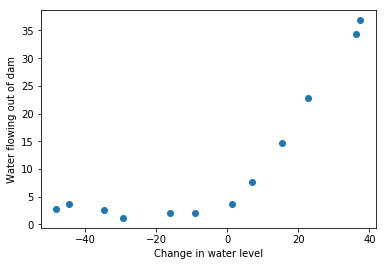

In [5]:
plt.scatter(X, y)
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam');

### Regularized linear regression cost function

Recall that regularized linear regression has the following cost function:

$$J(\theta) = \frac{1}{2m}(\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m}(\sum_{j=1}^n\theta_j^2)$$

where $\lambda is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost J.

In [6]:
def computeCost(theta, X, y, lam):
    theta = theta.reshape(-1, 1)   
    inside = np.power((X.dot(theta) - y), 2)
    J = (np.sum(inside) / (2 * X.shape[0]))
    
    reg_term = (lam/2*X.shape[0]) * np.sum(np.power(theta[1:], 2))
    return J + reg_term

In [7]:
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)

In [8]:
X_val= np.insert(X_val, 0, values=np.ones(X_val.shape[0]), axis=1)

In [9]:
theta = np.ones((X.shape[1],1))

Let's check this compared to the excercise;

In [10]:
computeCost(theta, X, y, 0)

303.9515255535976

Looking good!

### Regularized linear regression gradient

In [11]:
def gradient(theta, X, y, lam):
    theta = theta.reshape(-1, 1)   
    
    error = X.dot(theta) - y
    grad = X.T.dot(error) / X.shape[0]
    
    reg_term = (lam/X.shape[0])*theta[1:]
    
    return np.append(grad[0],(grad[1:] + reg_term)).reshape(-1,1)

Let's do a quick check;

In [12]:
gradient(theta, X, y, 0)

array([[-15.30301567],
       [598.16741084]])

Still looking good!

### Fitting linear regression

Once your cost function and gradient are working correctly, the next part of ex5.m will run the code in `trainLinearReg.m` to compute the optimal values of $\theta$. This training function uses `fmincg` to optimize the cost function. 

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization.

In [13]:
lam=0

In [14]:
res = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y, lam))

In [15]:
res

(array([13.08790362,  0.36777923]), 9, 1)

In [16]:
computeCost(res[0], X, y, 0)

22.373906495108923

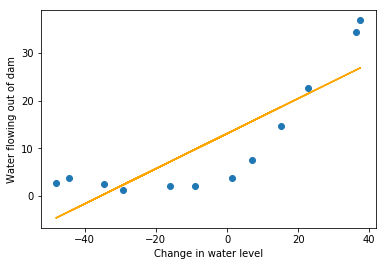

In [17]:
plt.scatter(X[:,1], y);
plt.plot(X[:,1], X.dot(res[0].T), label='fit', c='orange')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam');

##  Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

### Learning curves

You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. 

Your job is to fill in learningCurve.m so that it returns a vector of errors for the training set and cross validation set.

To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X. Specifically, for a training set size of i, you should use the first i examples.

In [18]:
error_train = []
error_val = []

for n in range(1,X.shape[0]):
    lam=1
    X_train = X[:n,:]
    y_train = y[:n,:]
    theta = np.ones((X_train.shape[1],1))
    
    res = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_train, y_train, lam))
    error_train.append(computeCost(res[0], X_train, y_train, lam))
    error_val.append(computeCost(res[0], X_val, y_val, 0))

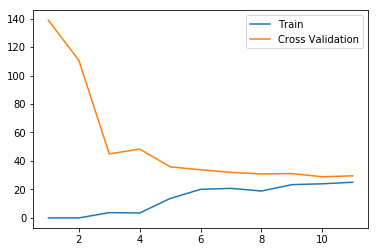

In [19]:
plt.plot(np.arange(1,X.shape[0]), error_train, label='Train')
plt.plot(np.arange(1,X.shape[0]), error_val, label='Cross Validation')
plt.legend();

In Figure 3, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model – the linear regression model is
too simple and is unable to fit our dataset well. In the next section, you will implement polynomial regression to fit a better model for this dataset.

## Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.

In [20]:
def poly_map(X, degree):
    for i in range(2, degree+1):
        X = np.concatenate((X, np.power(X[:,1], i).reshape(-1,1)), 1)
    return X

In [21]:
poly_map(X, 2)

array([[ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02],
       [ 1.00000000e+00, -2.91529792e+01,  8.49896197e+02],
       [ 1.00000000e+00,  3.61895486e+01,  1.30968343e+03],
       [ 1.00000000e+00,  3.74921873e+01,  1.40566411e+03],
       [ 1.00000000e+00, -4.80588295e+01,  2.30965109e+03],
       [ 1.00000000e+00, -8.94145794e+00,  7.99496701e+01],
       [ 1.00000000e+00,  1.53077929e+01,  2.34328523e+02],
       [ 1.00000000e+00, -3.47062658e+01,  1.20452489e+03],
       [ 1.00000000e+00,  1.38915437e+00,  1.92974986e+00],
       [ 1.00000000e+00, -4.43837599e+01,  1.96991814e+03],
       [ 1.00000000e+00,  7.01350208e+00,  4.91892115e+01],
       [ 1.00000000e+00,  2.27627489e+01,  5.18142738e+02]])

### Learning Polynomial Regression

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear
regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8.

It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled. Therefore, you will need to use feature normalization .

In [22]:
X_norm = (X - X.mean()) / X.std()
X_test_norm = (X_test - X_test.mean()) / X_test.std()
X_val_norm = (X_val - X_val.mean()) / X_val.std()

In [23]:
X_poly = poly_map(X_norm, 8)

In [24]:
theta = np.ones((X_poly.shape[1],1))

In [25]:
res = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_poly, y, 0))

In [26]:
computeCost(res[0], X_poly, y, 0)

0.0657908275503097

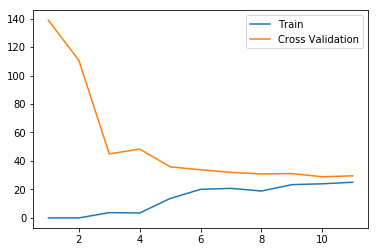

In [27]:
plt.plot(np.arange(1,X.shape[0]), error_train, label='Train')
plt.plot(np.arange(1,X.shape[0]), error_val, label='Cross Validation')
plt.legend();

### Selecting λ using a cross validation set

After selecting the best λ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

In [28]:
X_val_poly = poly_map(X_val_norm, 8)

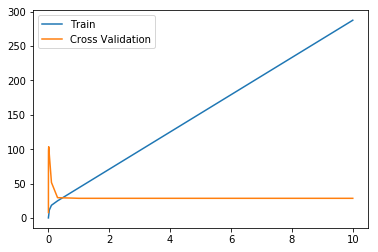

In [29]:
lams =  [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
error_train = []
error_val = []
for lam in lams:
    res = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_poly, y, lam))
    error_train.append(computeCost(res[0], X_poly, y, lam))
    error_val.append(computeCost(res[0], X_val_poly, y_val, 0))
    
plt.plot(lams, error_train, label='Train')
plt.plot(lams, error_val, label='Cross Validation')
plt.legend();

In this figure, we can see that the best value of λ is around 3. Due to randomness in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

### Computing test set error

In the previous part of the exercise, you implemented code to compute the cross validation error for various values of the regularization parameter λ. However, to get a better indication of the model’s performance in the real
world, it is important to evaluate the “final” model on a test set that was not used in any part of training (that is, it was neither used to select the λ parameters, nor to learn the model parameters θ).

For this optional (ungraded) exercise, you should compute the test error using the best value of λ you found.

In [30]:
res = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_poly, y, 3))

In [31]:
X_test_norm = np.insert(X_test_norm, 0, values=np.ones(X_test_norm.shape[0]), axis=1)

In [32]:
X_test_poly = poly_map(X_test_norm, 8)

In [33]:
computeCost(res[0], X_test_poly, y_test, 0)

74.1027175899131